Comparing Spots in PHOEBE 2 vs PHOEBE Legacy
============================

Setup
-----------------------------

As always, let's do imports and initialize a logger and a new bundle.  See [Building a System](../tutorials/building_a_system.html) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

b = phoebe.default_binary()

Adding Spots and Compute Options
---------------------

In [3]:
b.add_spot(component='primary', relteff=0.8, radius=20, colat=45, colon=90, feature='spot01')

<ParameterSet: 4 parameters | qualifiers: colat, radius, long, relteff>

In [4]:
b.add_dataset('lc', times=np.linspace(0,1,101))

<ParameterSet: 15 parameters | contexts: compute, dataset>

In [5]:
b.add_compute('phoebe', irrad_method='none', compute='phoebe2')

<ParameterSet: 17 parameters | components: primary, secondary>

In [6]:
b.add_compute('legacy', irrad_method='none', compute='phoebe1')

<ParameterSet: 7 parameters | components: primary, secondary>

Let's use the external atmospheres available for both phoebe1 and phoebe2

In [7]:
b.set_value_all('atm', 'extern_planckint')

Mon, 29 Oct 2018 10:09 PARAMETERS   WARNING ld_func='interp' only supported by atm='ck2004'.  Either change atm@primary or ld_func@primary@lc01  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Mon, 29 Oct 2018 10:09 PARAMETERS   WARNING ld_func='interp' only supported by atm='ck2004'.  Either change atm@primary or ld_func@primary@lc01  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Mon, 29 Oct 2018 10:09 PARAMETERS   WARNING ld_func='interp' only supported by atm='ck2004'.  Either change atm@primary or ld_func@primary@lc01  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Mon, 29 Oct 2018 10:09 PARAMETERS   WARNING ld_func='interp' only supported by atm='ck2004'.  Either change atm@primary or ld_func@primary@lc01  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Mon, 29 Oct 2018 10:09 PARAM

In [8]:
b.set_value_all('ld_func', 'logarithmic')
b.set_value_all('ld_coeffs', [0.0, 0.0])

Mon, 29 Oct 2018 10:09 PARAMETERS   WARNING ld_func='interp' only supported by atm='ck2004'.  Either change atm@primary or ld_func@primary@lc01  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Mon, 29 Oct 2018 10:09 PARAMETERS   WARNING ld_func='interp' only supported by atm='ck2004'.  Either change atm@secondary or ld_func@secondary@lc01  If not addressed, this warning will continue to be raised and will throw an error at run_compute.


In [9]:
b.run_compute('phoebe2', model='phoebe2model')

<ParameterSet: 2 parameters | qualifiers: fluxes, times>

In [10]:
b.run_compute('phoebe1', model='phoebe1model')

Mon, 29 Oct 2018 10:09 IO           WARNING requiv_max@primary@star@component has no phoebe 1 corollary
Mon, 29 Oct 2018 10:09 IO           WARNING freq@primary@star@component has no phoebe 1 corollary
Mon, 29 Oct 2018 10:09 IO           WARNING pitch@primary@star@component has no phoebe 1 corollary
Mon, 29 Oct 2018 10:09 IO           WARNING yaw@primary@star@component has no phoebe 1 corollary
Mon, 29 Oct 2018 10:09 IO           WARNING long_an@primary@star@component has no phoebe 1 corollary
Mon, 29 Oct 2018 10:09 IO           WARNING irrad_frac_lost_bol@primary@star@component has no phoebe 1 corollary
Mon, 29 Oct 2018 10:09 IO           WARNING ld_func_bol@primary@star@component has no phoebe 1 corollary
Mon, 29 Oct 2018 10:09 IO           WARNING mass@primary@star@component has no phoebe 1 corollary
Mon, 29 Oct 2018 10:09 IO           WARNING requiv_max@secondary@star@component has no phoebe 1 corollary
Mon, 29 Oct 2018 10:09 IO           WARNING freq@secondary@star@component has n

<ParameterSet: 2 parameters | qualifiers: fluxes, times>

Plotting
------------

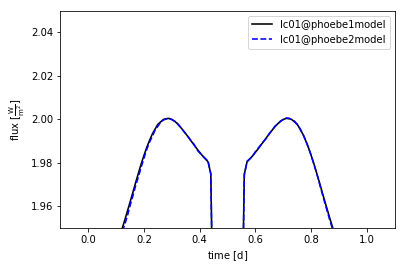

In [11]:
afig, mplfig = b.plot(legend=True, ylim=(1.95, 2.05), show=True)